# Classification models

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('data/df_0_oh.csv')

In [5]:
df.head(10)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue,"('New_Visitor',)","('Other',)","('Returning_Visitor',)"
0,0.0,0.0,0.0,0.0,1.0,0.0,0.200000,0.200000,0.0,0.0,2,1.0,1,1,1,0,0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,2.0,64.0,0.000000,0.100000,0.0,0.0,2,2.0,2,1,2,0,0,0.0,0.0,1.0
2,0.0,-1.0,0.0,-1.0,1.0,-1.0,0.200000,0.200000,0.0,0.0,2,4.0,1,9,3,0,0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,2.0,0.0,0.050000,0.140000,0.0,0.0,2,3.0,2,2,4,0,0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,10.0,627.5,0.020000,0.050000,0.0,0.0,2,3.0,3,1,4,1,0,0.0,0.0,1.0
5,0.0,0.0,0.0,0.0,19.0,0.0,0.015789,0.024561,0.0,0.0,2,2.0,2,1,3,0,0,0.0,0.0,1.0
6,0.0,-1.0,0.0,-1.0,1.0,-1.0,0.200000,0.200000,0.0,0.4,2,2.0,4,3,3,0,0,0.0,0.0,1.0
7,0.0,0.0,0.0,0.0,2.0,37.0,0.000000,0.100000,0.0,0.8,2,2.0,2,2,3,0,0,0.0,0.0,1.0
8,0.0,0.0,0.0,0.0,3.0,738.0,0.000000,0.022222,0.0,0.4,2,2.0,4,1,2,0,0,0.0,0.0,1.0
9,0.0,0.0,0.0,0.0,3.0,395.0,0.000000,0.066667,0.0,0.0,2,1.0,1,3,3,0,0,0.0,0.0,1.0


In [6]:
X = df.drop(columns='Revenue')
y = df['Revenue']

Divide in train and test

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35)

In [9]:
from sklearn.metrics import confusion_matrix, classification_report

## Logistic Regression

In [1]:
from sklearn.linear_model import LogisticRegression

Using all the data:

In [24]:
logreg = LogisticRegression(max_iter = 10000)
logreg.fit(X, y)
logreg.score(X,y)

0.8452535760728218

Dividing train and test:

In [33]:
logreg = LogisticRegression(max_iter = 10000)
logreg.fit(X_train, y_train)
logreg.score(X_test,y_test)

0.8514046900394706

In [46]:
y_pred_logreg = logreg.predict(X_test)

In [48]:
print(classification_report(y_test, y_pred_logreg ))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      3662
           1       0.58      0.03      0.05       645

    accuracy                           0.85      4307
   macro avg       0.72      0.51      0.49      4307
weighted avg       0.81      0.85      0.79      4307



In [47]:
confusion_matrix(y_test, y_pred_logreg)

array([[3649,   13],
       [ 627,   18]])

True positives = 18
False positives = 13
False negatives = 627

## Linear SVC (Support Vector Classification)

In [2]:
from sklearn.svm import LinearSVC

In [29]:
linsvc = LinearSVC(max_iter=100000)
linsvc.fit(X,y)
linsvc.score(X,y)

/Users/lola/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


0.831111833550065

Using train and test data

In [42]:
linsvc = LogisticRegression(max_iter = 100000)
linsvc.fit(X_train, y_train)
linsvc.score(X_test,y_test)

0.8514046900394706

In [45]:
y_pred_linsvc = linsvc.predict(X_test)

In [44]:
confusion_matrix(y_test, y_pred_linsvc)

array([[3649,   13],
       [ 627,   18]])

## K-Nearest Neighbor (KNN)

In [30]:
from sklearn.neighbors import KNeighborsClassifier

In [32]:
knn = KNeighborsClassifier()
knn.fit(X,y)
knn.score(X,y)

0.8637841352405722

Using train and test data

In [49]:
knn = LogisticRegression()
knn.fit(X_train, y_train)
knn.score(X_test,y_test)

/Users/lola/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8504759693522174

In [52]:
y_pred_knn = linsvc.predict(X_test)

In [53]:
confusion_matrix(y_test, y_pred_knn)

array([[3649,   13],
       [ 627,   18]])

# Treating unbalanced data

In [1]:
#taking a look at how unbalanced is our dat

Text(0, 0.5, 'Frequency')

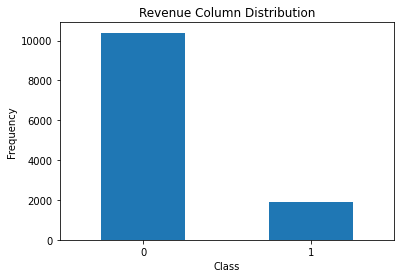

In [13]:
import matplotlib.pyplot as plt 

count_classes = pd.value_counts(df['Revenue'], sort = True)
count_classes.plot(kind = 'bar', rot=0)

plt.title("Revenue Column Distribution")
plt.xticks(range(2))
plt.xlabel("Class")
plt.ylabel("Frequency")

In [22]:
#applying SMOTE Tomek model to balance data between buyers and not buyers 
from imblearn.combine import SMOTETomek

oversamp_undersamp = SMOTETomek(sampling_strategy=0.6) #default sampling strategy

X_train_b, y_train_b = oversamp_undersamp.fit_sample(X, y)

X_train_b.shape,y_train_b.shape

((16056, 19), (16056,))

In [23]:
#counting and comparing the original dataset and the balanced one.
from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_train_b)))

Original dataset shape Counter({0: 10399, 1: 1905})
Resampled dataset shape Counter({0: 10108, 1: 5948})
